IMPORTING LIBIRIES

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
import seaborn as sns


LOAD THE DATA

In [41]:
df = pd.read_csv("/content/Student_Performance.csv")

In [42]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Handling Missing Values

In [44]:
print(df.isnull().sum())


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


shapng the data

In [45]:
df.shape

(10000, 6)

check if duplicated in data

In [46]:
duplicate_rows = df.duplicated()
print(duplicate_rows.sum())

127


quick info of numeric values

In [47]:
df.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


drop missing values

In [65]:
df = df.dropna()

In [66]:
df.describe(include = object)


,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


Univariate Analysis

In [70]:
def count_plot(column_name, hue = None, rotation = 0):

    graph = sns.countplot(x = column_name, data = df, hue = hue, order = df[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [71]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):

    sns.catplot(x = x_axis, y = y_axis, data = df, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [72]:
print(df.columns)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [73]:
df["Hours Studied"].unique()



array([7, 4, 8, 5, 3, 6, 2, 1, 9])

In [74]:
unique_hours = df["Hours Studied"].unique()

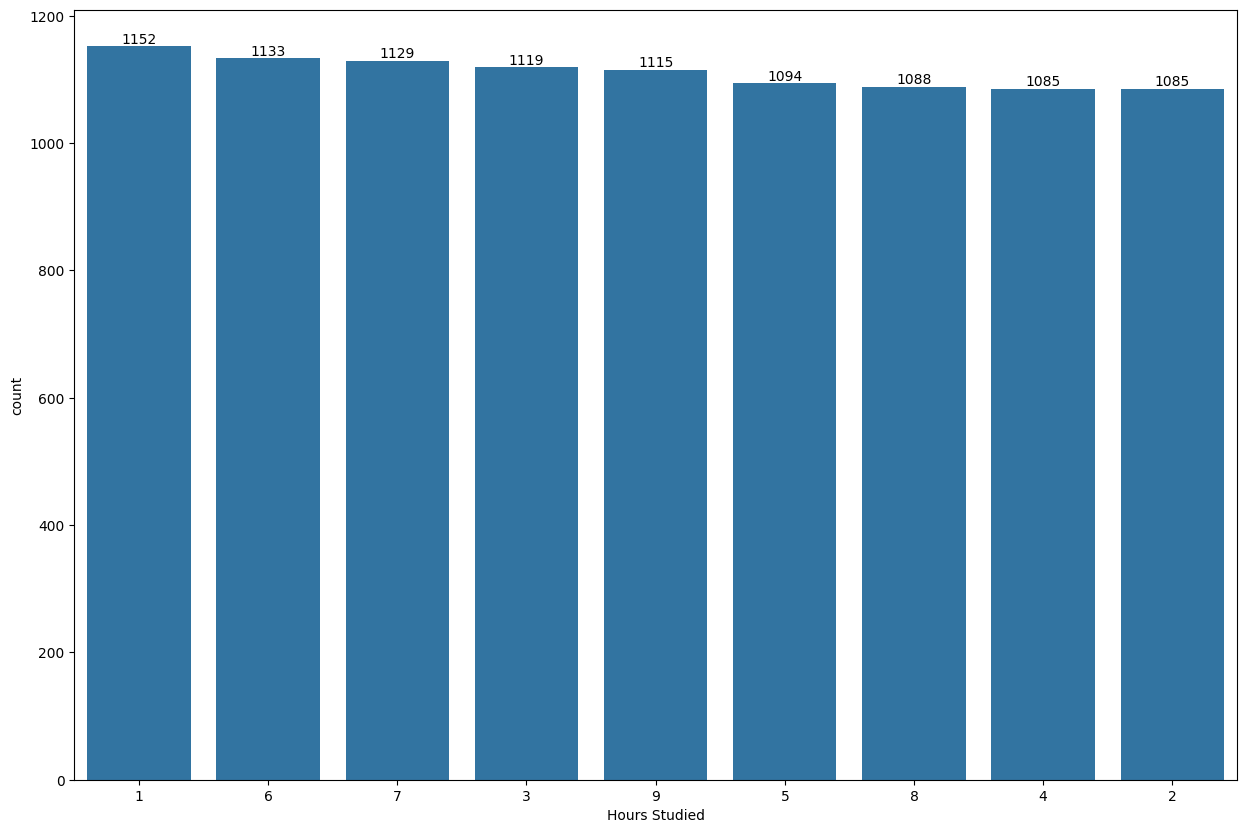

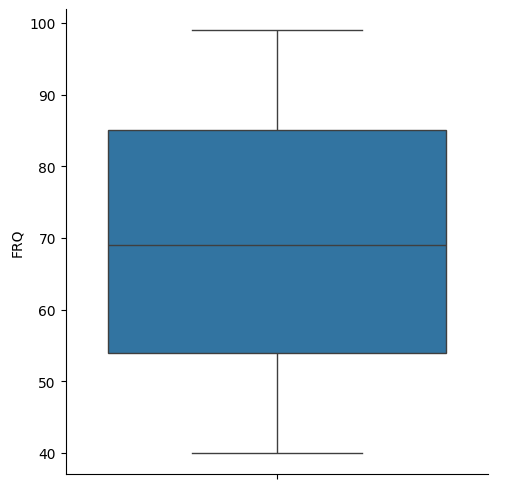

In [79]:
plt.figure(figsize = (15,10))
count_plot(column_name = "Hours Studied")
box_plot(y_axis = "Previous Scores")

Discovering Extracurricular Activities colum

In [81]:
df["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

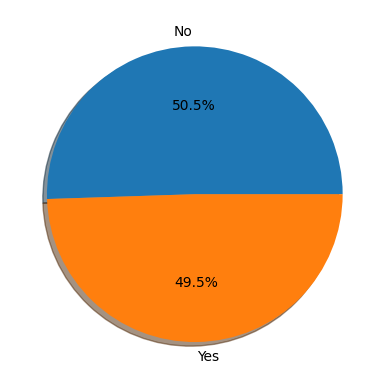

In [84]:
plt.pie(df["Extracurricular Activities"].value_counts(), labels = df["Extracurricular Activities"].value_counts().index,
        shadow = True, autopct = "%1.1f%%")
plt.show()

We can see :

Most student "don't" participate in extracurricular activities

Discovering Sleep Hours column

In [85]:
df["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6])

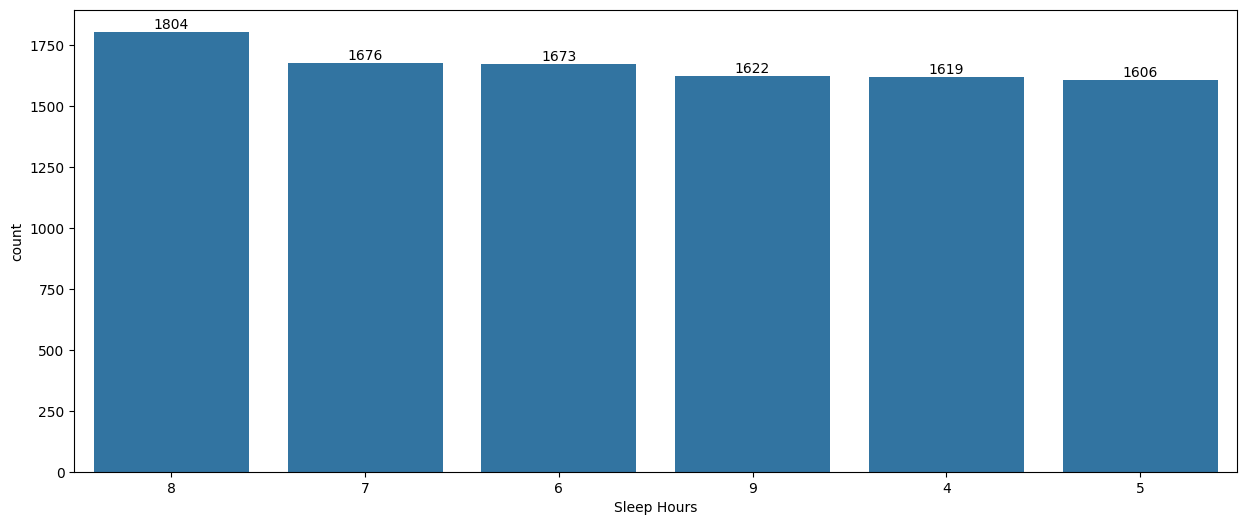

In [86]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Sleep Hours")

We can see :

Most student Sleep 8 hours
Other students sleep Similar numbers of hours
Discovering Sample Question Papers Practiced column

In [87]:
df["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7])

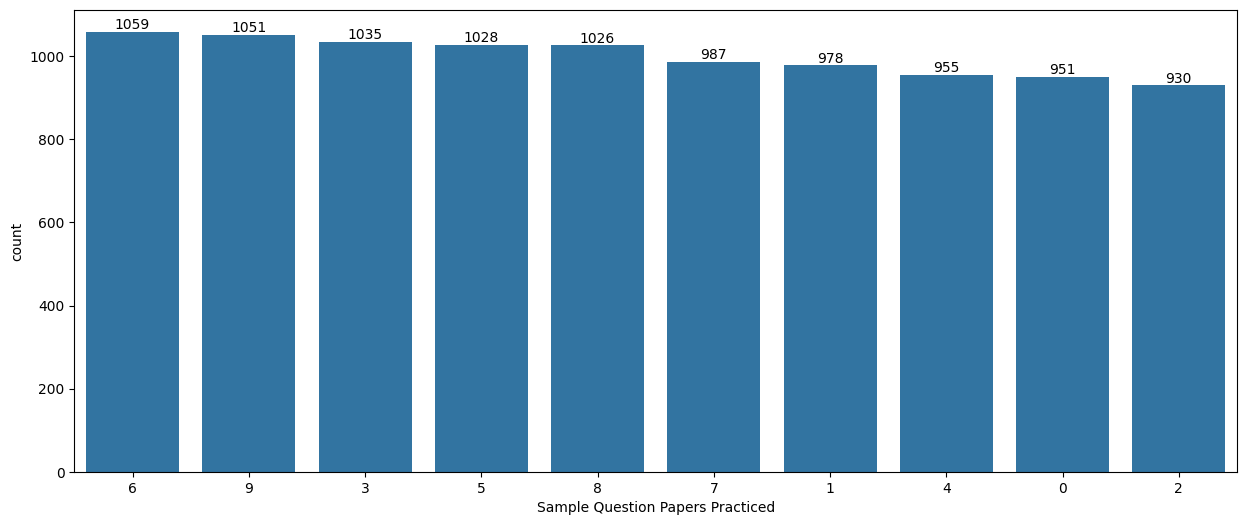

In [88]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Sample Question Papers Practiced")

We can see :

All student have Similar The number of sample question papers the practiced.
There are students who did not practice any questions

Bivariate Analysis & Visualizations

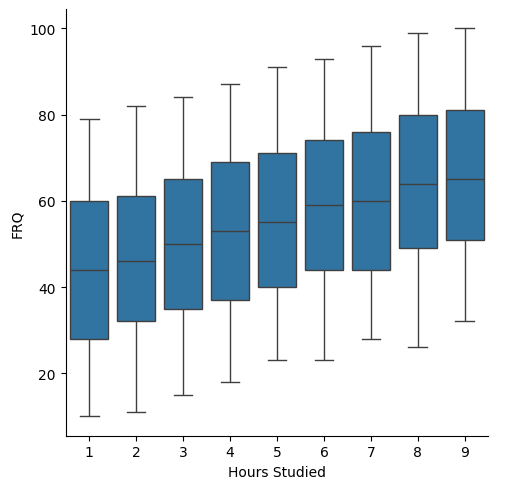

In [89]:
box_plot(x_axis = "Hours Studied", y_axis = "Performance Index")

As we can see, the more hours you study, the greater the success rate

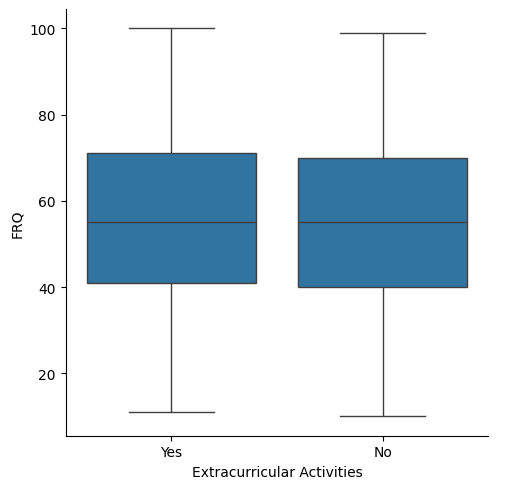

In [90]:
box_plot(x_axis = "Extracurricular Activities", y_axis = "Performance Index")

Participation in extracurricular activities helps to a very small extent in obtaining high grades

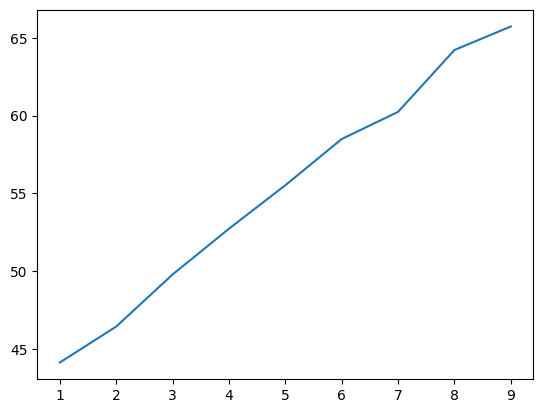

In [92]:
avg_performance_by_hours = df.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

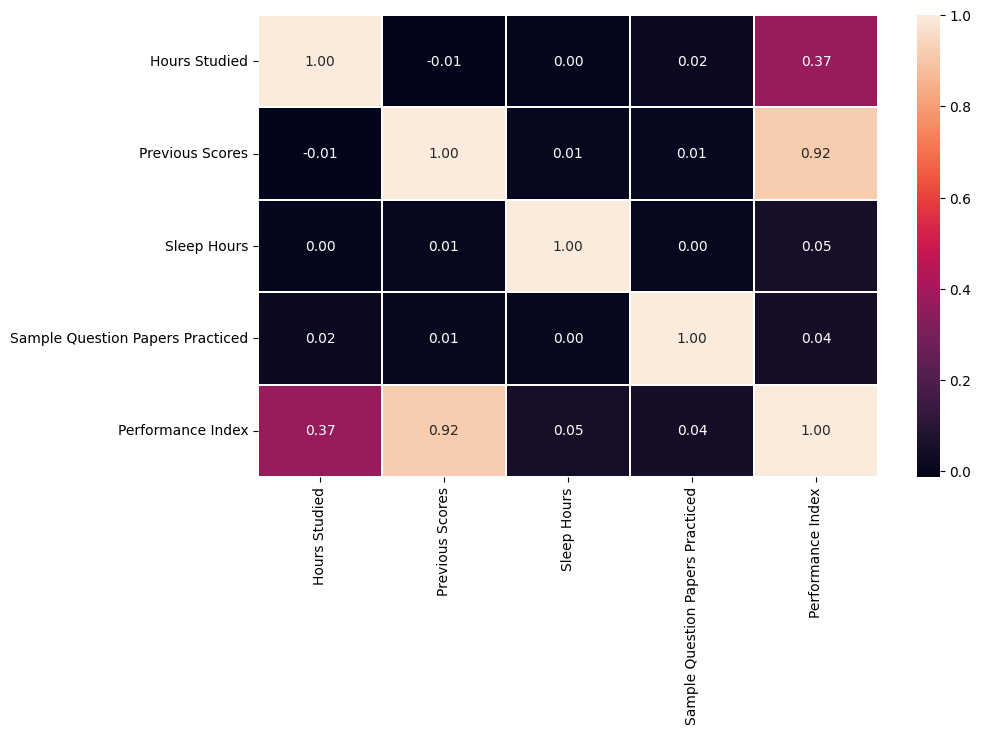

In [94]:
plt.figure(figsize = (10,6))
sns.heatmap(df.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

Data Preprocessing

In [95]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

create object from labelencoder

In [98]:
encoder = LabelEncoder()

df["Extracurricular Activities"] =  encoder.fit_transform(df["Extracurricular Activities"])

sample of data

In [100]:
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
7572,3,81,0,7,0,60.0
794,1,94,0,9,4,73.0
8097,2,85,1,9,3,61.0
6747,8,53,1,8,0,49.0
8700,8,64,1,7,4,58.0


Train the model

In [101]:
Train = df.drop(columns = "Performance Index")
Target = df["Performance Index"]

In [102]:
Train.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6374,4,44,0,6,4
8648,3,69,1,9,4
3366,5,88,1,8,5


In [103]:
Target

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

split the data

In [105]:
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


Modeling

In [106]:
model = LinearRegression()

In [107]:
model.fit(X_train,y_train)

LinearRegression()

Evaluating Results

In [108]:
model.score(X_train, y_train)

0.9886898790682355

In [109]:
predict = np.round(model.predict(X_test), decimals = 1)

Real Values vs Predicted Values

In [110]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


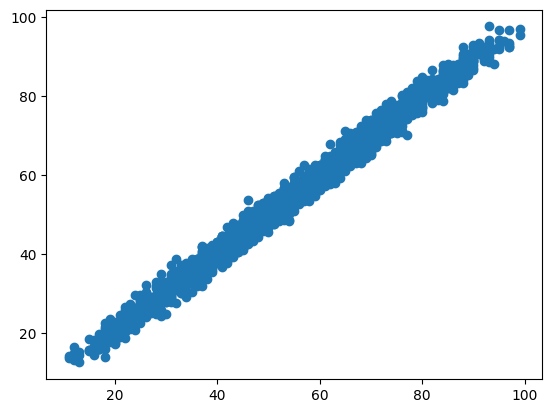

In [111]:
plt.scatter(y_test, predict)
plt.show()

RESULTS

In [112]:
mean_absolute_error(y_test,predict)


1.612

In [113]:
r2_score(y_test,predict)

0.9889704960519785

In [114]:
model.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [115]:
model.intercept_

-33.92194621555638